In [1]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/Mateo/Desktop/UNAD/SEMESTRE II/ANÁLISIS DE DATOS/Tarea 3/Anexo 2 - Dataset Vehicle/Car details v3.csv'
dataset_v3 = pd.read_csv(file_path)

print("Columnas del dataset:", dataset_v3.columns)

dataset_v3_cleaned = dataset_v3.dropna(subset=['mileage', 'engine', 'max_power']).copy()

dataset_v3_cleaned = dataset_v3_cleaned.replace('', np.nan)

dataset_v3_cleaned['max_power'] = pd.to_numeric(dataset_v3_cleaned['max_power'].str.replace(' bhp', ''), errors='coerce')

dataset_v3_cleaned = dataset_v3_cleaned.dropna(subset=['mileage', 'engine', 'max_power'])

try:
    # Limpiar y convertir 'mileage'
    dataset_v3_cleaned['mileage'] = dataset_v3_cleaned['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
    
    # Limpiar y convertir 'engine'
    dataset_v3_cleaned['engine'] = dataset_v3_cleaned['engine'].str.replace(' CC', '').astype(float)
    
    print("Columnas 'mileage', 'engine', y 'max_power' limpiadas y convertidas exitosamente.")
except Exception as e:
    print("Error al limpiar y convertir las columnas:", e)

print(dataset_v3_cleaned.info())
print(dataset_v3_cleaned.head())

dataset_v3_cleaned.to_csv('Car_details_v3_cleaned.csv', index=False)
print("Dataset limpio guardado como 'Car_details_v3_cleaned.csv'.")


Columnas del dataset: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')
Columnas 'mileage', 'engine', y 'max_power' limpiadas y convertidas exitosamente.
<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  torque         7906 non-nu

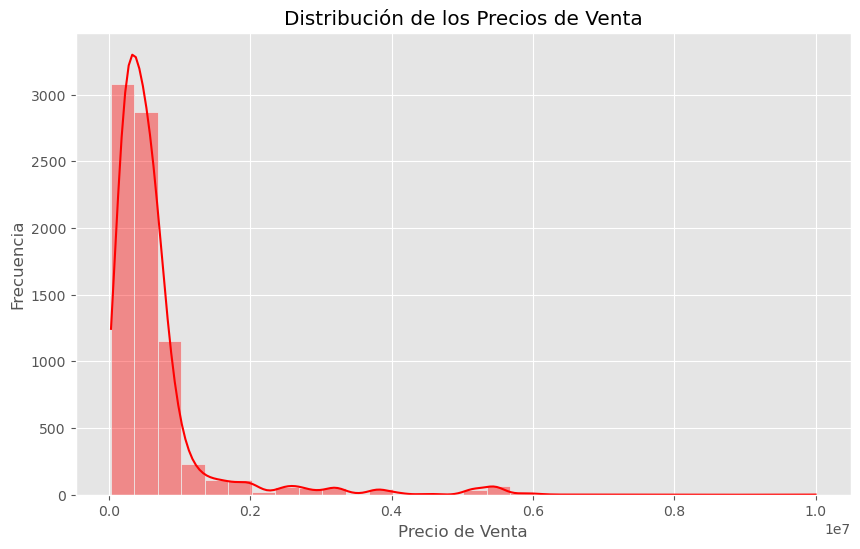

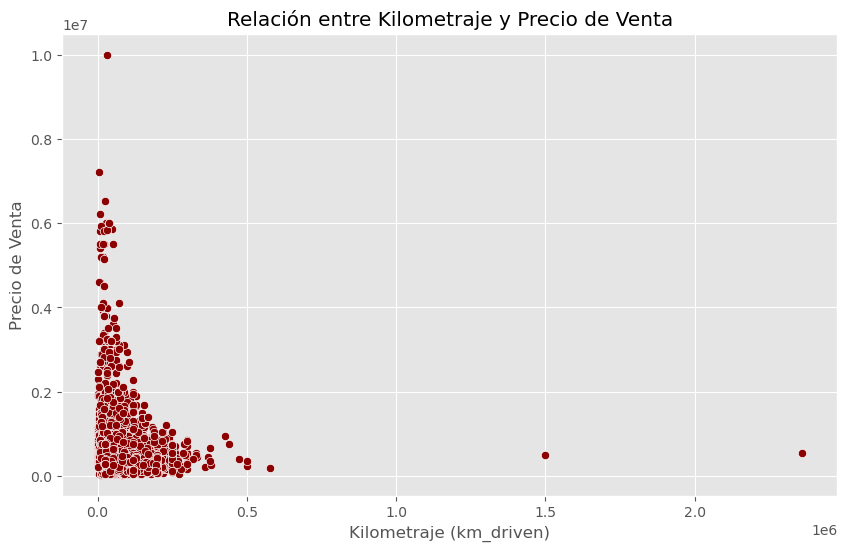

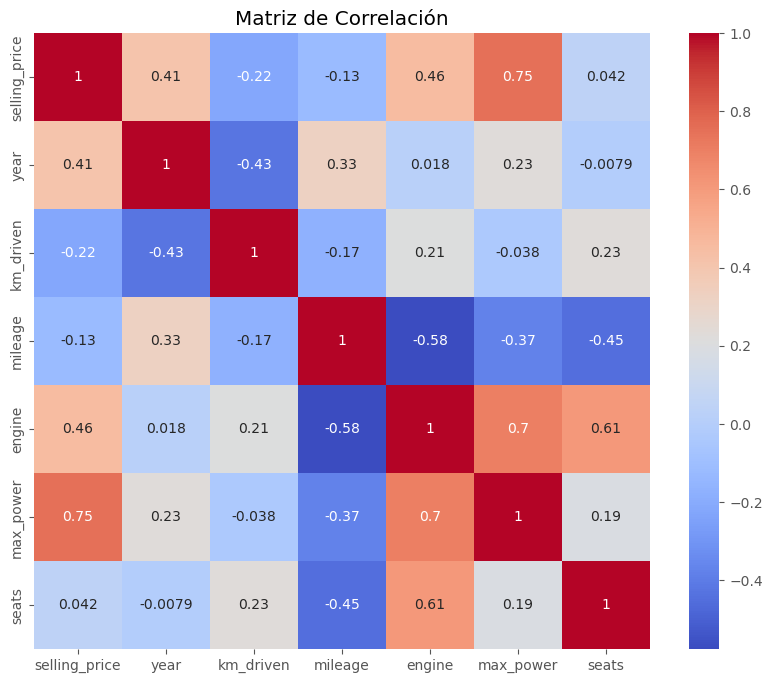

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
sns.histplot(dataset_v3_cleaned['selling_price'], bins=30, kde=True, color="red", alpha=0.4)
plt.title('Distribución de los Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_v3_cleaned, x='km_driven', y='selling_price', color="darkred")
plt.title('Relación entre Kilometraje y Precio de Venta')
plt.xlabel('Kilometraje (km_driven)')
plt.ylabel('Precio de Venta')
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = dataset_v3_cleaned[['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()
